In [1]:
#Numpy - for scientific computing
import numpy as np
import scipy
from scipy import optimize
from scipy.optimize import curve_fit 

#For image reading and analysis
import glob
import skimage.io
import skimage.filters as sf
from skimage import io, measure, filters, transform, morphology

#Matplotlib plotting packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
#sns.set()

import lmfit

# For loading bars
from tqdm.notebook import tqdm as tqdm

# For creating DataFrames
import pandas as pd

In [74]:
#Import files and add the names as strings to an array
file_path = '../../analyzed_data/gliding/'
# ff1 = '2023-07-10_Gliding/'
# ff2 = '2023-07-11_Gliding/'
# ff3 = '2023-07-12_Gliding/'
# ff4 = '2023-08-11_Gliding/'
# ff5 = '2023-08-15_Gliding/'
# ff6 = '2023-08-16_Gliding/'
# ff7 = '2023-08-17_Gliding/'
# ff8 = '2023-08-18_Gliding/'
# ff9 = '2023-09-07_Gliding/'
ff10 = '2023-10-18_Gliding/'
ff11 = '2023-10-19_Gliding/'
ff12 = '2023-10-20_Gliding/'
ff13 = '2023-10-21_Gliding/'
ff14 = '2023-10-23_Gliding/'
ff15 = '2023-10-24_Gliding/'
ff16 = '2023-10-26_Gliding/'
ff17 = '2023-10-30_Gliding/'
ff18 = '2023-10-31_Gliding/'
ff = [ff10, ff11, ff12, ff13, ff14, ff15, ff16, ff17, ff18]
included_files = '*.csv'

data_csv = []
for file_folder in ff:
    path = file_path+file_folder+included_files
    files = np.sort(glob.glob(path))
    data_csv.append(files)
data_csv = np.concatenate(data_csv)

#Convert file names to a dataframe
dfs = []
for file in data_csv:
    temp_df=pd.read_csv(file)
    #add a column of file names
    temp_df['date']=file.split('/')[-2].split('_')[0]
    temp_df['file_name']=file.split('/')[-1]
    dfs.append(temp_df)
df=pd.concat(dfs)

#reset the index and drop any extraneous columns
df=df.reset_index()
df=df.drop(columns=['Unnamed: 0', 'level_0'])

In [70]:
df

,index,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,speed (nm/s),r^2,...,P_Conc_uM,Flag_Conc_mg-ml,BSA_Caesin_Both,Acq_Time_s,Time_Interval_s,Cy5_exptime_ms,Cy5_gain,YFP_exptime_ms,YFP_gain,Temperature
0,0,16,18.589987,1.161841,34.500000,403.937500,-0.127752,4,59.590909,0.987100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,18,23.324453,1.412290,51.111111,177.500000,-1.095814,5,62.742647,0.918239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21,25.084174,1.441082,63.000000,398.857143,-0.263513,7,65.931781,0.895895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,27,31.275885,1.271210,70.000000,413.851852,0.087832,8,95.312227,0.995682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,24,33.758195,1.738728,64.791667,154.500000,-0.960848,9,79.463964,0.974283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,35,22,25.383637,0.996635,439.909091,39.500000,1.548179,74,78.609770,0.857185,...,5000.0,0.02,Both,100.0,1.0,60.0,300.0,100.0,4.0,NaN
6424,36,23,26.667654,1.088133,440.000000,87.000000,-1.470177,75,60.436923,0.973170,...,5000.0,0.02,Both,100.0,1.0,60.0,300.0,100.0,4.0,NaN
6425,37,7,10.376916,0.853099,463.000000,389.285714,-0.693287,79,8.032605,0.864920,...,5000.0,0.02,Both,100.0,1.0,60.0,300.0,100.0,4.0,NaN
6426,39,27,31.971517,1.316943,486.074074,122.000000,1.344186,82,27.688908,0.971912,...,5000.0,0.02,Both,100.0,1.0,60.0,300.0,100.0,4.0,NaN


# New Najma Data

In [99]:
najma_files = ['TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_ilid_1_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_ilid_1_start50_stop100.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_ilid_2_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_ilid_2_start50_stop100.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_ilid_3_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_ilid_3_start50_stop100.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_micro_1_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_micro_1_start50_stop100.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_micro_2_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_micro_2_start50_stop100.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_micro_3_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_Mcherry_micro_3_start50_stop100.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_newYFP_ilid_1_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_newYFP_ilid_1_start50_stop100.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_newYFP_ilid_2_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_newYFP_ilid_2_start50_stop100.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_newYFP_ilid_3_start0_stop51.csv',
       'TIRF_100x_1sInterval_0.25uMNCD_1420uMATP_1to50Antiflag_newYFP_ilid_3_start50_stop100.csv']

Text(12, 250, 'YFP iLid')

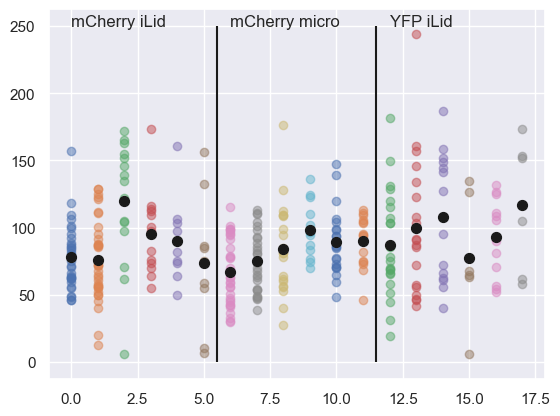

In [100]:
#df.groupby('file_name')
for i, file in enumerate(najma_files):
    df_temp=df.loc[(df["file_name"] == file)]
    plt.scatter(i*np.ones(len(df_temp)), df_temp['speed (nm/s)'], alpha=0.5)
    plt.scatter(float(i), np.mean(df_temp['speed (nm/s)']), c='k', s=50) 
plt.vlines(5.5, 0, 250, color='k')
plt.vlines(11.5, 0, 250, color='k')
plt.text(0, 250, 'mCherry iLid')
plt.text(6, 250, 'mCherry micro')
plt.text(12, 250, 'YFP iLid')

In [6]:
df_temp=df.loc[(df["date"] == '2023-10-19')]
df_temp.groupby('file_name').mean().reset_index()

,file_name,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,speed (nm/s),r^2,skele r^2,MT len (um),...,ADP_Conc_uM,P_Conc_uM,Flag_Conc_mg-ml,Acq_Time_s,Time_Interval_s,Cy5_exptime_ms,Cy5_gain,YFP_exptime_ms,YFP_gain,Temperature
0,0.01uM_start0_stop51.csv,27.048977,2.472617,299.852429,202.873036,0.079959,154.733759,0.958874,0.873713,2.519336,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
1,0.01uM_start50_stop100.csv,35.863622,1.515662,250.531675,210.726712,-0.316600,143.972296,0.981102,0.901445,2.301849,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
2,0.125uM_start0_stop51.csv,34.096729,2.875725,218.882247,240.021979,-0.238369,135.353393,0.954876,0.944112,2.452108,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
3,0.125uM_start50_stop100.csv,43.792051,1.853227,281.576772,299.855993,-0.028358,152.365275,0.973632,0.976001,2.659306,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
4,0.25uM_start0_stop51.csv,45.046827,3.377347,208.124936,272.163888,0.147182,137.171931,0.955550,0.937130,2.888354,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
5,0.25uM_start50_stop100.csv,51.770851,2.536862,234.736193,207.951273,0.316583,148.413753,0.960611,0.865650,2.752443,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
6,0.5uM_start0_stop51.csv,32.367992,1.571226,342.462355,251.306141,0.209851,79.611966,0.963209,0.911546,3.296684,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
7,0.5uM_start50_stop100.csv,46.174511,2.934726,282.736386,267.964684,-0.029288,100.625053,0.971892,0.859686,2.888962,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
8,1uM_start0_stop51.csv,38.236227,3.317712,289.317115,230.998590,0.165261,144.542604,0.979985,0.978598,2.205246,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN
9,1uM_start50_stop100.csv,35.889275,2.126494,298.743185,269.736503,0.352869,129.023531,0.973888,0.959699,2.658910,...,0.0,0.0,0.02,100.0,1.0,60.0,NaN,100.0,4.0,NaN


# Motors

In [7]:
np.unique(df_temp['Motor_Conc_uM'])

array([0.01 , 0.125, 0.25 , 0.5  , 1.   , 3.   ,   nan])

Text(0, 0.5, 'Speed (nm/s)')

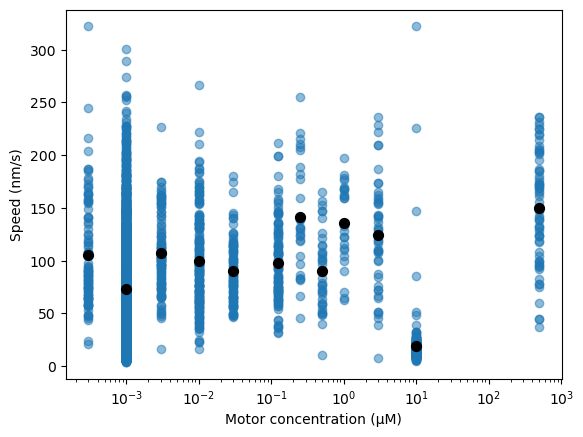

In [8]:
df_temp=df.loc[(df["date"] >= '2023-10-19')]
plt.scatter(df_temp['Motor_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.5)
plt.scatter( df_temp.groupby('Motor_Conc_uM').mean().reset_index()['Motor_Conc_uM'], df_temp.groupby('Motor_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=50) 
plt.xscale('log')
plt.xlabel('Motor concentration (µM)')
plt.ylabel('Speed (nm/s)')

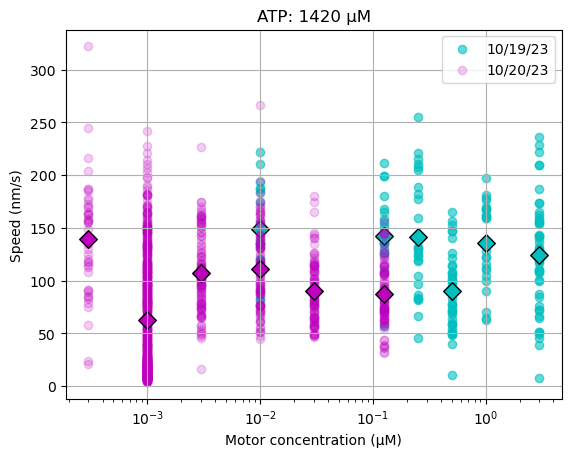

In [9]:
df_temp=df.loc[(df["date"] == '2023-10-19')]
plt.scatter(df_temp['Motor_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='10/19/23', c='c')
plt.scatter( df_temp.groupby('Motor_Conc_uM').mean().reset_index()['Motor_Conc_uM'], df_temp.groupby('Motor_Conc_uM').mean().reset_index()['speed (nm/s)'], c='c', s=80, marker='D', edgecolor='k') 
df_temp=df.loc[(df["date"] == '2023-10-20')]
plt.scatter(df_temp['Motor_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.2,  label='10/20/23', c='m')
plt.scatter( df_temp.groupby('Motor_Conc_uM').mean().reset_index()['Motor_Conc_uM'], df_temp.groupby('Motor_Conc_uM').mean().reset_index()['speed (nm/s)'], c='m', s=80, marker='D', edgecolor='k') 
plt.xscale('log')
plt.xlabel('Motor concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.legend()
plt.title('ATP: 1420 µM')
plt.grid(True)

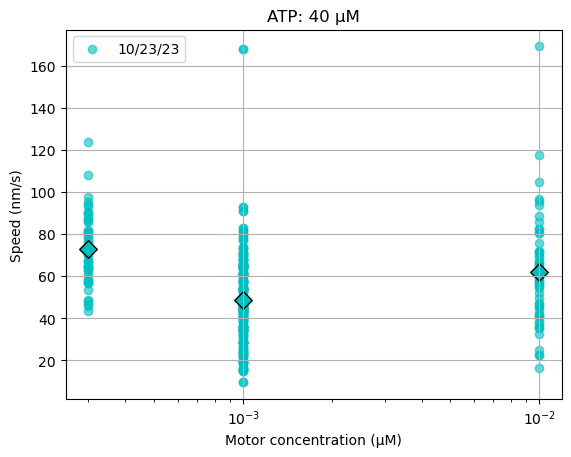

In [10]:
df_temp=df.loc[(df["date"] == '2023-10-23')].loc[(df['ATP_Conc_uM'] == 40)]
plt.scatter(df_temp['Motor_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='10/23/23', c='c')
plt.scatter( df_temp.groupby('Motor_Conc_uM').mean().reset_index()['Motor_Conc_uM'], df_temp.groupby('Motor_Conc_uM').mean().reset_index()['speed (nm/s)'], c='c', s=80, marker='D', edgecolor='k') 
plt.xscale('log')
plt.xlabel('Motor concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.legend()
plt.title('ATP: 40 µM')
plt.grid(True)

# ATP

In [11]:
#Speed ATP fit
def kcatKm_eqn(conc, kcat, Km):
    """
    Given a concentration value in uM, this function returns motor speeds in nm/s
    
    Parameters:
    conc = 1D array of ATP concentrations in uM units
    kcat = maximum hydrolysis rate at saturating ATP units 1/s
    Km = concnetration at which motors walk at half max speed in units uM
    
    Returns:
    A 1D array of motor speeds corresponding to the given concentrations
    """
    
    return (kcat*conc)/(Km +conc)



#Curve-fit to the Langmuir curve
def kcatKm_curve_fit(conc, speeds, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(kcatKm_eqn, 
                                 conc, 
                                 speeds/d,
                                 p0, 
                                 bounds = (np.zeros(2), np.ones([2])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcatKm_eqn(xvals, param[0], param[1])
    
    return param, curve, xvals

Text(0.5, 1.0, '10-20-2023')

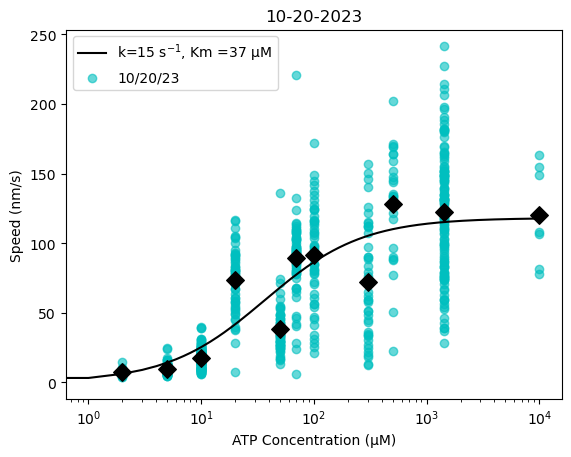

In [12]:
df_temp=df.loc[(df["date"] == '2023-10-20')].loc[(df["Motor_Conc_uM"] == 0.001)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='10/20/23', c='c')
ATP_mean = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM'], df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=80, marker='D') 

param, curve, xval = kcatKm_curve_fit(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) + ' µM')
plt.legend()
plt.xscale('log')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('10-20-2023')

Text(0.5, 1.0, '10-21-2023')

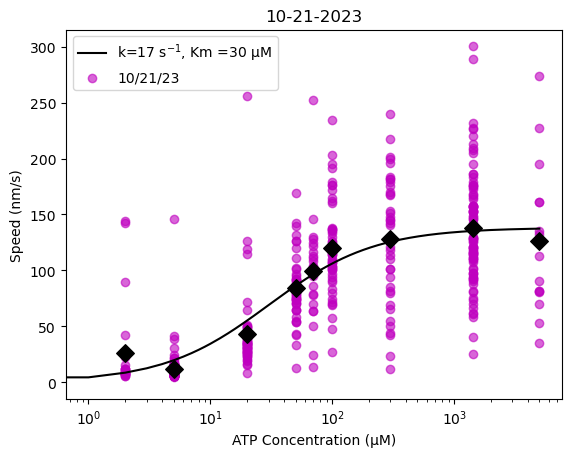

In [13]:
df_temp=df.loc[(df["date"] == '2023-10-21')].loc[(df["Motor_Conc_uM"] == 0.001)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='10/21/23', c='m')
ATP_mean = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM'], df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=80, marker='D') 

param, curve, xval = kcatKm_curve_fit(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) + ' µM')
plt.legend()
plt.xscale('log')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('10-21-2023')

Text(0.5, 1.0, '10-23-2023')

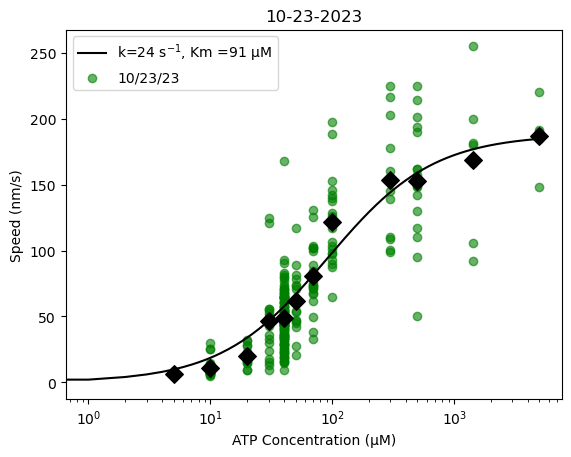

In [14]:
df_temp=df.loc[(df["date"] == '2023-10-23')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["Temperature"]==27.1)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='10/23/23', c='g')
ATP_mean = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM'], df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='k', s=80, marker='D') 

param, curve, xval = kcatKm_curve_fit(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) +' µM')
plt.legend()
plt.xscale('log')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('10-23-2023')

Text(0, 0.5, 'Speed (nm/s)')

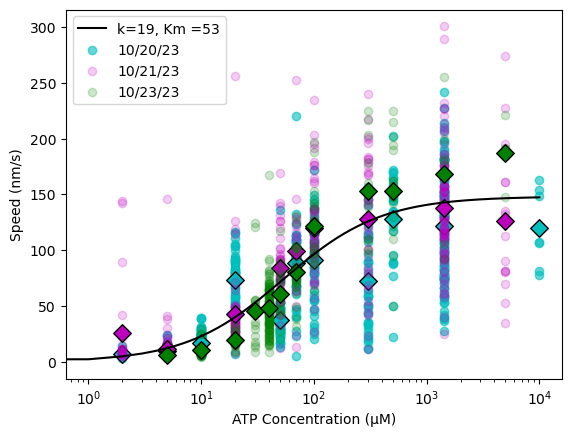

In [26]:
df_temp1=df.loc[(df["date"] == '2023-10-20')].loc[(df["Motor_Conc_uM"] == 0.001)]
df_temp2=df.loc[(df["date"] == '2023-10-21')].loc[(df["Motor_Conc_uM"] == 0.001)]
df_temp3=df.loc[(df["date"] == '2023-10-23')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["Temperature"]==27.1)]
df_temp = pd.concat([df_temp1, df_temp2, df_temp3])

plt.scatter(df_temp1['ATP_Conc_uM'], df_temp1['speed (nm/s)'], alpha=0.6, label='10/20/23', c='c')
ATP_mean20 = df_temp1.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed20 = df_temp1.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( ATP_mean20, ATP_mean_speed20, c='c', s=80, marker='D', edgecolor='k') 

plt.scatter(df_temp2['ATP_Conc_uM'], df_temp2['speed (nm/s)'], alpha=0.2, label='10/21/23', c='m')
ATP_mean21 = df_temp2.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed21 = df_temp2.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( ATP_mean21, ATP_mean_speed21, c='m', s=80, marker='D', edgecolor='k')

plt.scatter(df_temp3['ATP_Conc_uM'], df_temp3['speed (nm/s)'], alpha=0.2, label='10/23/23', c='g')
ATP_mean23 = df_temp3.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed23 = df_temp3.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( ATP_mean23, ATP_mean_speed23, c='g', s=80, marker='D', edgecolor='k')

ATP_mean = np.concatenate((ATP_mean20, ATP_mean21, ATP_mean23))#df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed = np.concatenate((ATP_mean_speed20, ATP_mean_speed21, ATP_mean_speed23))#df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
#plt.scatter( ATP_mean, ATP_mean_speed, c='k', s=80, marker='D', edgecolor='k')

param, curve, xval = kcatKm_curve_fit(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ', Km =' + str(round(param[1])))
plt.legend()
plt.xscale('log')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')

# Number of counts per condition

(array([ 5., 20., 18.,  5.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  8.53809955,  20.90494457,  33.27178959,  45.63863462,
         58.00547964,  70.37232466,  82.73916968,  95.10601471,
        107.47285973, 119.83970475, 132.20654977, 144.5733948 ,
        156.94023982, 169.30708484, 181.67392986, 194.04077489,
        206.40761991, 218.77446493, 231.14130995, 243.50815498,
        255.875     ]),
 <BarContainer object of 20 artists>)

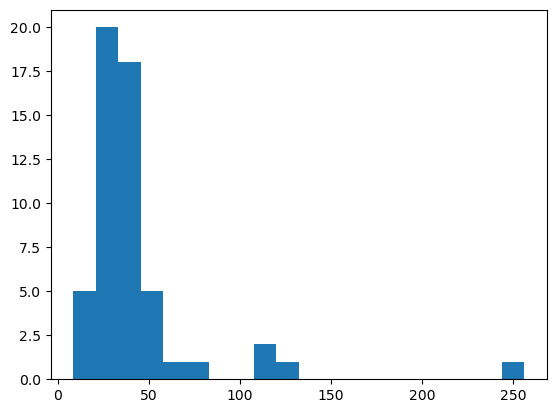

In [53]:
plt.hist(df.loc[(df["date"] == '2023-10-21')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df['ATP_Conc_uM'] == 20)]['speed (nm/s)'], bins=20)

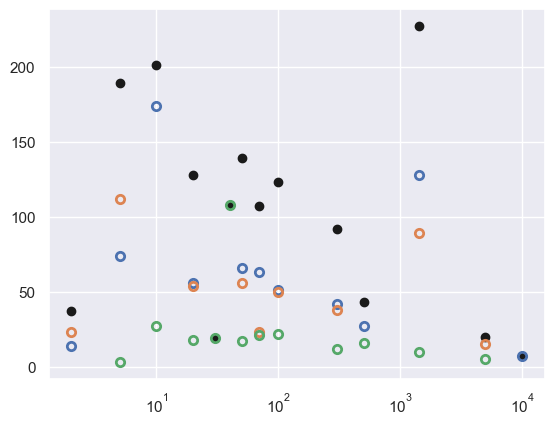

In [89]:
df_temp1=df.loc[(df["date"] == '2023-10-20')].loc[(df["Motor_Conc_uM"] == 0.001)]
df_temp2=df.loc[(df["date"] == '2023-10-21')].loc[(df["Motor_Conc_uM"] == 0.001)]
df_temp3=df.loc[(df["date"] == '2023-10-23')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["Temperature"]==27.1)]
df_temp = pd.concat([df_temp1, df_temp2, df_temp3]).groupby('ATP_Conc_uM', as_index=False).size()

# fig, ax = plt.subplots(1, len(np.unique(df_temp['ATP_Conc_uM'])), figsize=(20,2))
# for i, A in enumerate(np.unique(df_temp['ATP_Conc_uM'])):
#     ax[i].hist(df_temp.loc[(df_temp['ATP_Conc_uM']==A)]['speed (nm/s)'], bins=30)
plt.plot(df_temp['ATP_Conc_uM'], df_temp['size'], 'o', color='k')

df_temp_plot = df_temp1.groupby('ATP_Conc_uM', as_index=False).size()
plt.plot(df_temp_plot['ATP_Conc_uM'], df_temp_plot['size'], 'o', markeredgewidth=2,  markerfacecolor='none')

df_temp_plot = df_temp2.groupby('ATP_Conc_uM', as_index=False).size()
plt.plot(df_temp_plot['ATP_Conc_uM'], df_temp_plot['size'], 'o', markeredgewidth=2, markerfacecolor='none')

df_temp_plot = df_temp3.groupby('ATP_Conc_uM', as_index=False).size()
plt.plot(df_temp_plot['ATP_Conc_uM'], df_temp_plot['size'], 'o', markeredgewidth=2, markerfacecolor='none')


plt.xscale('log')


ValueError: could not broadcast input array from shape (0,) into shape (1,)

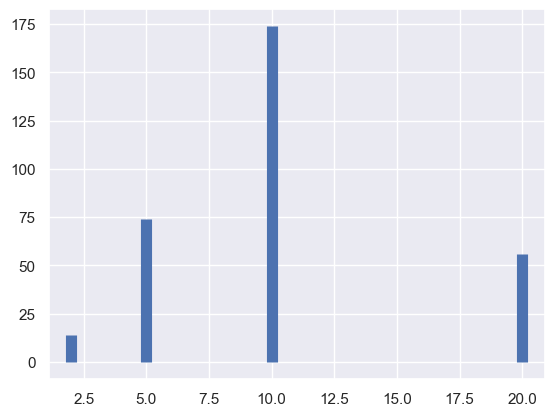

In [96]:
df_temp1=df.loc[(df["date"] == '2023-10-20')].loc[(df["Motor_Conc_uM"] == 0.001)].groupby('ATP_Conc_uM', as_index=False).size()
df_temp2=df.loc[(df["date"] == '2023-10-21')].loc[(df["Motor_Conc_uM"] == 0.001)].groupby('ATP_Conc_uM', as_index=False).size()
df_temp3=df.loc[(df["date"] == '2023-10-23')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["Temperature"]==27.1)].groupby('ATP_Conc_uM', as_index=False).size()
df_temp = pd.concat([df_temp1, df_temp2, df_temp3])

for i, A in enumerate(np.unique(df_temp['ATP_Conc_uM'])):
    plt.vlines(A, 0, df_temp1.loc[(df_temp1['ATP_Conc_uM']==A)]['size'], lw=8)
    
plt.xscale('log')

In [57]:
plt.scatter(df_temp.groupby('ATP_Conc_uM', as_index=False).size()['ATP_Conc_uM'])

,ATP_Conc_uM,size
0,2.0,37
1,5.0,189
2,10.0,201
3,20.0,128
4,30.0,19
5,40.0,108
6,50.0,139
7,70.0,107
8,100.0,123
9,300.0,92


# ATP and ADP

In [35]:
#Curve-fit to the Langmuir curve
def Kprod_curve_fit(prodconc, speeds, ATPconc, kcat, Kt, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    def Kprod_eqn(prodconc, Kprod, ATPconc=ATPconc, Kt=Kt):
        """
        Given a concentration value in uM, this function returns motor speeds in nm/s

        Parameters:
        conc = 1D array of ATP concentrations in uM units
        kcat = maximum hydrolysis rate at saturating ATP units 1/s
        Km = concnetration at which motors walk at half max speed in units uM

        Returns:
        A 1D array of motor speeds corresponding to the given concentrations
        """
        return (ATPconc)/(Kt*(1 + prodconc/Kprod) + ATPconc)

    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(Kprod_eqn, 
                                 prodconc,
                                 speeds/(d*kcat),
                                 p0, 
                                 bounds = (np.zeros(1), np.ones([1])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcat*Kprod_eqn(xvals, param[0])
    
    return param, curve, xvals

Text(0.5, 1.0, 'No Phosphate, varying ATP')

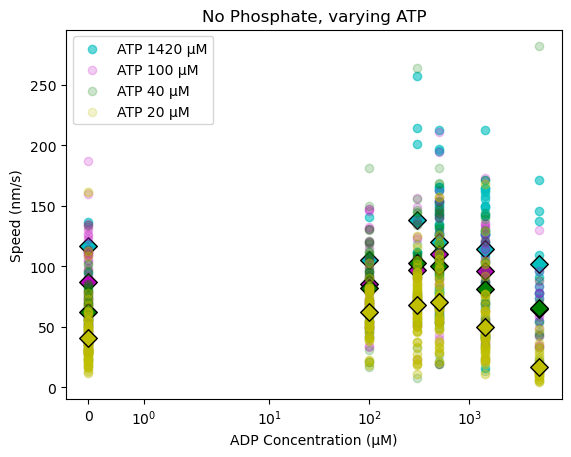

In [17]:
df_temp=df.loc[(df["date"] == '2023-10-24')].loc[(df["ATP_Conc_uM"] == 1420)]
plt.scatter(df_temp['ADP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='ATP 1420 µM', c='c')
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='c', edgecolor='k', s=80, marker='D') 

# param, curve, xval = Kprod_curve_fit(ADP_mean, ADP_mean_speed, ATPconc=100, kcat=19, Kt=53, maxconc=np.max(ADP_mean), d=8, p0=[50])
# plt.plot(xval, curve, c='c', label ='$K_D$ =' + str(round(param[0])) +' µM')
#---#

df_temp=df.loc[(df["date"] == '2023-10-24')].loc[(df["ATP_Conc_uM"] == 100)]
plt.scatter(df_temp['ADP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.2, label='ATP 100 µM', c='m')
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], c='m', edgecolor='k', s=80, marker='D') 

# param, curve, xval = Kprod_curve_fit(ADP_mean, ADP_mean_speed, ATPconc=100, kcat=19, Kt=53, maxconc=np.max(ADP_mean), d=8, p0=[50])
# plt.plot(xval, curve, c='m', label ='$K_D$ =' + str(round(param[0])) +' µM')
#---#

df_temp=df.loc[(df["date"] == '2023-10-26')].loc[(df["ATP_Conc_uM"] == 40)].loc[(df["P_Conc_uM"] == 0.0)]
plt.scatter(df_temp['ADP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.2, label='ATP 40 µM', c='g')
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='g', 
            edgecolor='k', 
            s=80, 
            marker='D') 
#---#

df_temp=df.loc[(df["date"] == '2023-10-26')].loc[(df["ATP_Conc_uM"] == 20)].loc[(df["P_Conc_uM"] == 0.0)]
plt.scatter(df_temp['ADP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.2, label='ATP 20 µM', c='y')
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='y', 
            edgecolor='k', 
            s=80, 
            marker='D') 
#---#


plt.legend()

plt.xscale('symlog')
#plt.yscale('log')
plt.xlabel('ADP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('No Phosphate, varying ATP')

Text(0.5, 1.0, 'No Phosphate, varying ATP')

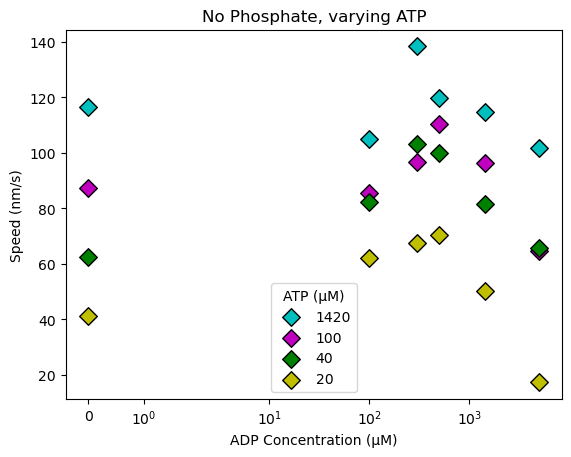

In [19]:
df_temp=df.loc[(df["date"] == '2023-10-24')].loc[(df["ATP_Conc_uM"] == 1420)]
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='c', 
            edgecolor='k', 
            s=80, 
            marker='D',
           label=1420) 

# param, curve, xval = Kprod_curve_fit(ADP_mean, ADP_mean_speed, ATPconc=100, kcat=19, Kt=53, maxconc=np.max(ADP_mean), d=8, p0=[50])
# plt.plot(xval, curve, c='c', label ='$K_D$ =' + str(round(param[0])) +' µM')
#---#

df_temp=df.loc[(df["date"] == '2023-10-24')].loc[(df["ATP_Conc_uM"] == 100)]
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='m', 
            edgecolor='k', 
            s=80, 
            marker='D',
           label=100) 

# param, curve, xval = Kprod_curve_fit(ADP_mean, ADP_mean_speed, ATPconc=100, kcat=19, Kt=53, maxconc=np.max(ADP_mean), d=8, p0=[50])
# plt.plot(xval, curve, c='m', label ='$K_D$ =' + str(round(param[0])) +' µM')
#---#

df_temp=df.loc[(df["date"] == '2023-10-26')].loc[(df["ATP_Conc_uM"] == 40)].loc[(df["P_Conc_uM"] == 0.0)]
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='g', 
            edgecolor='k', 
            s=80, 
            marker='D',
           label=40) 
#---#

df_temp=df.loc[(df["date"] == '2023-10-26')].loc[(df["ATP_Conc_uM"] == 20)].loc[(df["P_Conc_uM"] == 0.0)]
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='y', 
            edgecolor='k', 
            s=80, 
            marker='D',
            label=20) 
#---#


plt.legend(title = 'ATP (µM)')

plt.xscale('symlog')
#plt.yscale('log')
plt.xlabel('ADP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('No Phosphate, varying ATP')

# P

(0.0, 150.0)

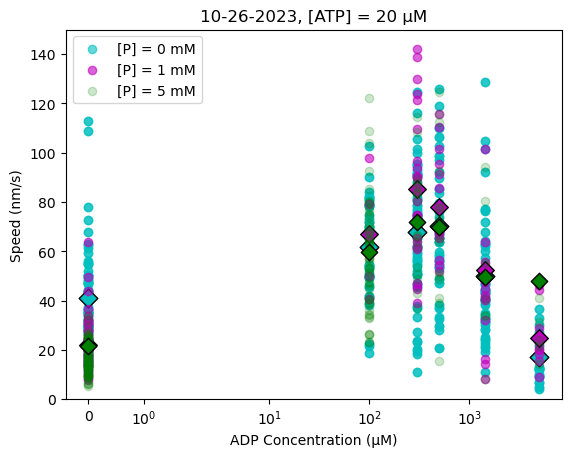

In [25]:
df_temp=df.loc[(df["date"] == '2023-10-26')].loc[(df["ATP_Conc_uM"] == 20)].loc[(df["P_Conc_uM"] == 0.0)]
plt.scatter(df_temp['ADP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='[P] = 0 mM', c='c')
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='c', 
            edgecolor='k', 
            s=90, 
            marker='D') 

# param, curve, xval = Kprod_curve_fit(ADP_mean, ADP_mean_speed, ATPconc=100, kcat=19, Kt=53, maxconc=np.max(ADP_mean), d=8, p0=[50])
# plt.plot(xval, curve, c='c', label ='$K_D$ =' + str(round(param[0])) +' µM')

df_temp=df.loc[(df["date"] == '2023-10-26')].loc[(df["ATP_Conc_uM"] == 20)].loc[(df["P_Conc_uM"] == 1000)]
plt.scatter(df_temp['ADP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='[P] = 1 mM', c='m')
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='m', 
            edgecolor='k', 
            s=80, 
            marker='D') 


df_temp=df.loc[(df["date"] == '2023-10-26')].loc[(df["ATP_Conc_uM"] == 20)].loc[(df["P_Conc_uM"] == 5000)]
plt.scatter(df_temp['ADP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.2, label='[P] = 5 mM', c='g')
ADP_mean = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM']
ADP_mean_speed = df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( df_temp.groupby('ADP_Conc_uM').mean().reset_index()['ADP_Conc_uM'], 
            df_temp.groupby('ADP_Conc_uM').mean().reset_index()['speed (nm/s)'], 
            c='g', 
            edgecolor='k', 
            s=70, 
            marker='D') 


# param, curve, xval = Kprod_curve_fit(ADP_mean, ADP_mean_speed, ATPconc=100, kcat=19, Kt=53, maxconc=np.max(ADP_mean), d=8, p0=[50])
# plt.plot(xval, curve, c='m', label ='$K_D$ =' + str(round(param[0])) +' µM')
plt.legend()

plt.xscale('symlog')
#plt.yscale('log')
plt.xlabel('ADP Concentration (µM)')
plt.ylabel('Speed (nm/s)')
plt.title('10-26-2023, [ATP] = 20 µM')
plt.ylim(0, 150)

Text(0.5, 1.0, '10-30-2023, [ATP] = 40 µM')

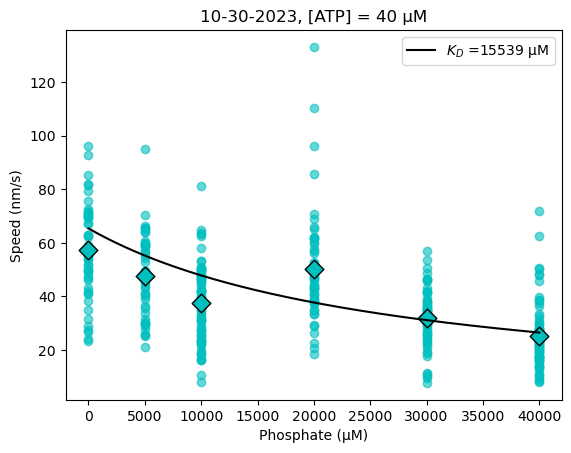

In [40]:
df_temp=df.loc[(df["date"] == '2023-10-30')]
plt.scatter(df_temp['P_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='c')
P_mean = df_temp.groupby('P_Conc_uM', as_index=False).mean()['P_Conc_uM']
P_mean_speed = df_temp.groupby('P_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter(P_mean, 
            P_mean_speed, 
            c='c', 
            edgecolor='k', 
            s=90, 
            marker='D')
param, curve, xval = Kprod_curve_fit(P_mean, P_mean_speed, ATPconc=40, kcat=19, Kt=53, maxconc=np.max(P_mean), d=8, p0=[50])
plt.plot(xval, curve, c='k', label ='$K_D$ =' + str(round(param[0])) +' µM')
plt.xlabel('Phosphate (µM)')
plt.ylabel('Speed (nm/s)')
plt.legend()
plt.title('10-30-2023, [ATP] = 40 µM')

In [51]:
np.unique(df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 1420)]['P_Conc_uM'])

array([    0., 10000., 20000., 30000., 40000.])

Text(0.5, 1.0, '10-31-2023')

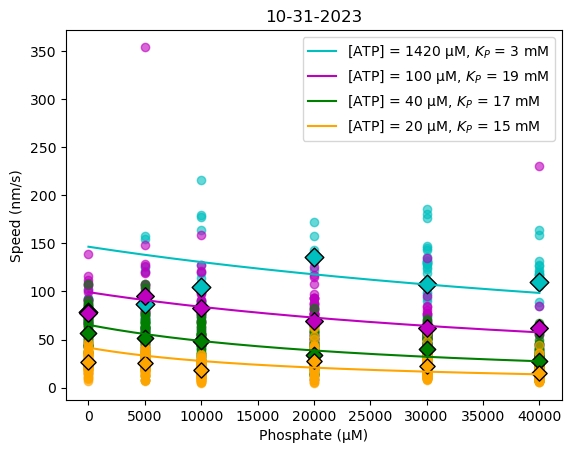

In [81]:
df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 1420)]
plt.scatter(df_temp['P_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='c')

df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 100)]
plt.scatter(df_temp['P_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='m')

df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 40)]
plt.scatter(df_temp['P_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='g')

df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 20)]
plt.scatter(df_temp['P_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, c='orange')
#---

df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 1420)]
P_mean = df_temp.groupby('P_Conc_uM', as_index=False).mean()['P_Conc_uM']
P_mean_speed = df_temp.groupby('P_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter(P_mean, 
            P_mean_speed, 
            c='c', 
            edgecolor='k', 
            s=90, 
            marker='D')
param, curve, xval = Kprod_curve_fit(P_mean, P_mean_speed, ATPconc=1420, kcat=19, Kt=53, maxconc=np.max(P_mean), d=8, p0=[50])
plt.plot(xval, curve, c='c', label ='[ATP] = 1420 µM, $K_P$ = ' + str(round(param[0]/1000)) +' mM')

df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 100)]
P_mean = df_temp.groupby('P_Conc_uM', as_index=False).mean()['P_Conc_uM']
P_mean_speed = df_temp.groupby('P_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter(P_mean, 
            P_mean_speed, 
            c='m', 
            edgecolor='k', 
            s=80, 
            marker='D')
param, curve, xval = Kprod_curve_fit(P_mean, P_mean_speed, ATPconc=100, kcat=19, Kt=53, maxconc=np.max(P_mean), d=8, p0=[50])
plt.plot(xval, curve, c='m', label ='[ATP] = 100 µM, $K_P$ = ' + str(round(param[0]/1000)) +' mM')

df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 40)]
P_mean = df_temp.groupby('P_Conc_uM', as_index=False).mean()['P_Conc_uM']
P_mean_speed = df_temp.groupby('P_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter(P_mean, 
            P_mean_speed, 
            c='g', 
            edgecolor='k', 
            s=70, 
            marker='D')
param, curve, xval = Kprod_curve_fit(P_mean, P_mean_speed, ATPconc=40, kcat=19, Kt=53, maxconc=np.max(P_mean), d=8, p0=[50])
plt.plot(xval, curve, c='g', label ='[ATP] = 40 µM, $K_P$ = ' + str(round(param[0]/1000)) +' mM')

df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 20)]
P_mean = df_temp.groupby('P_Conc_uM', as_index=False).mean()['P_Conc_uM']
P_mean_speed = df_temp.groupby('P_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter(P_mean, 
            P_mean_speed, 
            c='orange', 
            edgecolor='k', 
            s=60, 
            marker='D')
param, curve, xval = Kprod_curve_fit(P_mean, P_mean_speed, ATPconc=20, kcat=19, Kt=53, maxconc=np.max(P_mean), d=8, p0=[50])
plt.plot(xval, curve, c='orange', label ='[ATP] = 20 µM, $K_P$ = ' + str(round(param[0]/1000)) +' mM')

plt.xlabel('Phosphate (µM)')
plt.ylabel('Speed (nm/s)')
plt.legend()
plt.title('10-31-2023')

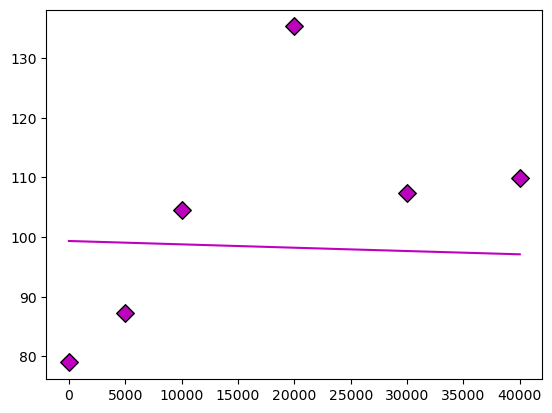

In [80]:
df_temp=df.loc[(df["date"] == '2023-10-31')].loc[(df["ATP_Conc_uM"] == 1420)]
P_mean = df_temp.groupby('P_Conc_uM', as_index=False).mean()['P_Conc_uM']
P_mean_speed = df_temp.groupby('P_Conc_uM', as_index=False).mean()['speed (nm/s)']
plt.scatter(P_mean, 
            P_mean_speed, 
            c='m', 
            edgecolor='k', 
            s=80, 
            marker='D')
param, curve, xval = Kprod_curve_fit(P_mean, P_mean_speed, ATPconc=100, kcat=19, Kt=53, maxconc=np.max(P_mean), d=8, p0=[50])
plt.plot(xval, curve, c='m', label ='[ATP] = 100 µM, $K_P$ = ' + str(round(param[0]/1000)) +' mM')

In [77]:
P_mean

0        0.0
1     5000.0
2    10000.0
3    20000.0
4    30000.0
5    40000.0
Name: P_Conc_uM, dtype: float64

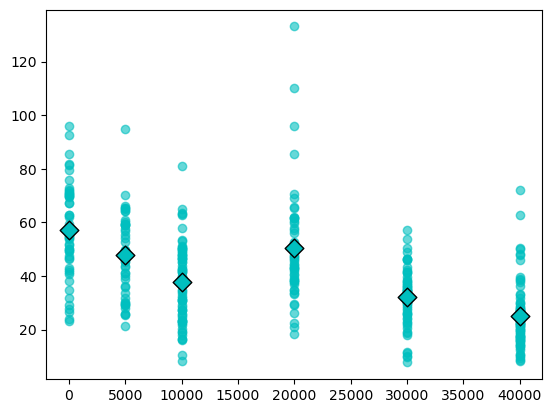

In [32]:
for p in np.unique(df.loc[(df["date"] == '2023-10-30')].loc[(df["ATP_Conc_uM"] == 40)]['P_Conc_uM']):
    df_temp=df.loc[(df["date"] == '2023-10-30')].loc[(df["ATP_Conc_uM"] == 40)].loc[(df["P_Conc_uM"] == p)]
    plt.scatter(df_temp['P_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label=p, c='c')
    ADP_mean = df_temp.groupby('P_Conc_uM', as_index=False).mean()['P_Conc_uM']
    ADP_mean_speed = df_temp.groupby('P_Conc_uM', as_index=False).mean()['speed (nm/s)']
    plt.scatter(df_temp.groupby('P_Conc_uM').mean().reset_index()['P_Conc_uM'], 
                df_temp.groupby('P_Conc_uM').mean().reset_index()['speed (nm/s)'], 
                c='c', 
                edgecolor='k', 
                s=90, 
                marker='D')


In [118]:
df.loc[(df["date"] == '2023-10-26')].loc[(df["ATP_Conc_uM"] == 40)]['P_Conc_uM']#.loc[(df["P_Conc_uM"] == 0)]

3692    0.0
3693    0.0
3694    0.0
3695    0.0
3696    0.0
       ... 
4081    0.0
4082    0.0
4083    0.0
4084    0.0
4085    0.0
Name: P_Conc_uM, Length: 220, dtype: float64

### df_temp=df.loc[(df["date"] == '2023-10-20')].loc[(df["Motor_Conc_uM"] == 0.001)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.6, label='10/20/23', c='c')
ATP_mean20 = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed20 = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( ATP_mean20, ATP_mean_speed20, c='c', s=80, marker='D', edgecolor='k') 

df_temp=df.loc[(df["date"] == '2023-10-21')].loc[(df["Motor_Conc_uM"] == 0.001)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.2, label='10/21/23', c='m')
ATP_mean21 = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed21 = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( ATP_mean21, ATP_mean_speed21, c='m', s=80, marker='D', edgecolor='k')

df_temp=df.loc[(df["date"] == '2023-10-23')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["Temperature"]==27.1)]
plt.scatter(df_temp['ATP_Conc_uM'], df_temp['speed (nm/s)'], alpha=0.2, label='10/23/23', c='g')
ATP_mean23 = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['ATP_Conc_uM']
ATP_mean_speed23 = df_temp.groupby('ATP_Conc_uM').mean().reset_index()['speed (nm/s)']
plt.scatter( ATP_mean23, ATP_mean_speed23, c='g', s=80, marker='D', edgecolor='k')


ATP_mean = np.concatenate((ATP_mean20, ATP_mean21, ATP_mean23))
ATP_mean_speed = np.concatenate((ATP_mean_speed20, ATP_mean_speed21, ATP_mean_speed23))
        
param, curve, xval = kcatKm_curve_fit(ATP_mean, ATP_mean_speed, np.max(ATP_mean), 8, [100, 100])
plt.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ' s$^{-1}$, Km =' + str(round(param[1])) +' µM')
plt.legend()
plt.xscale('log')
plt.xlabel('ATP Concentration (µM)')
plt.ylabel('Speed (nm/s)')

In [72]:
np.concatenate((ATP_mean20, ATP_mean21))

array([2.00e+00, 5.00e+00, 1.00e+01, 2.00e+01, 5.00e+01, 7.00e+01,
       1.00e+02, 3.00e+02, 5.00e+02, 1.42e+03, 1.00e+04, 2.00e+00,
       5.00e+00, 2.00e+01, 5.00e+01, 7.00e+01, 1.00e+02, 3.00e+02,
       1.42e+03, 5.00e+03])

In [60]:
np.where(df.loc[(df["date"] == '2023-10-23')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ATP_Conc_uM"])==40].loc[(df["Temperature"]==27.2)].reset_index()['speed (nm/s)'] != df.loc[(df["date"] == '2023-10-23')].loc[(df["Motor_Conc_uM"] == 0.001)].loc[(df["ATP_Conc_uM"])==40].loc[(df["Temperature"]==27.1)].reset_index()['speed (nm/s)'])

(array([], dtype=int64),)

In [150]:
df_temp=df.loc[(df["date"] == '2023-10-20')].reset_index()
motvals = []
for i, name in enumerate(df_temp['file_name']):
    motval = df_temp['file_name'].iloc[i].split('_')[3].split('n')[0]
    df_temp['motor conc'].iloc[i]=motval
# motvals=np.array(motvals)

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_49893/3984320820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['motor conc'].iloc[i]=motval


In [140]:
# df_temp['motor conc'] = df_temp['file_name'].iloc[0].split('_')[3].split('n')[0]

In [151]:
df_temp

,level_0,index,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,speed (nm/s),...,skele r^2,MT len (um),motor conc,MT dilute,ATP,ADP,P,time (seconds),date,file_name
0,6034,0,34,34.814024,7.429319,138.058824,167.176471,0.869814,17,148.569853,...,0.991926,3.548058,0.3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
1,6035,8,22,25.450051,1.780706,207.500000,92.545455,0.075892,40,169.878676,...,0.976018,2.798976,0.3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
2,6036,13,36,47.965921,4.036725,312.500000,177.861111,-0.525091,57,136.181818,...,0.977725,3.499478,0.3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
3,6037,14,80,81.677148,4.776082,365.975000,57.662500,0.299507,60,186.511142,...,0.871895,2.110523,0.3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
4,6038,1,25,27.003081,6.393872,87.240000,222.880000,0.989080,16,75.133333,...,0.250000,3.105657,0.3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,6545,23,25,33.272849,1.828429,318.000000,111.280000,-0.522707,40,113.017241,...,0.982405,2.316839,3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...
512,6546,24,74,79.858358,6.467420,318.175676,241.418919,-1.525809,41,150.984998,...,0.190398,3.655647,3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...
513,6547,25,11,12.974583,1.202217,348.545455,471.000000,1.345351,42,71.012500,...,0.955133,2.152634,3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...
514,6548,28,21,28.422952,1.415734,413.619048,357.000000,-1.019356,47,111.707265,...,0.886476,2.444777,3,NaN,NaN,NaN,NaN,NaN,2023-10-20,TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...


In [130]:
df_temp['file_name'].iloc[0].split('_')[3].split('n')[0]

'0.3'

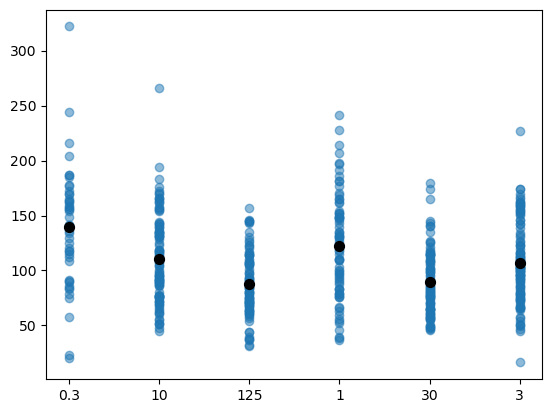

In [160]:
#df.groupby('file_name')
# df_temp=df.loc[(df["date"] == '2023-10-20')]
# df_temp['motor conc'] = df_temp['file_name'].iloc[].split('_')[3].split('n')[0]
plt.scatter(df_temp['motor conc'], df_temp['speed (nm/s)'], alpha=0.5)
plt.scatter(df_temp.groupby('motor conc').mean().reset_index()['motor conc'], df_temp.groupby('motor conc').mean().reset_index()['speed (nm/s)'], c='k', s=50) 


In [162]:
df_temp.groupby('motor conc').mean().reset_index()

,motor conc,level_0,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,speed (nm/s),r^2,skele r^2,MT len (um),MT dilute,ATP,ADP,P,time (seconds)
0,0.3,6056.5,55.289971,4.363011,227.284722,253.289683,0.139006,139.426583,0.941258,0.823708,3.800053,NaN,NaN,NaN,NaN,NaN
1,1,6308.0,41.294566,3.484536,217.773372,292.098226,-0.048100,122.614415,0.958262,0.904876,2.756812,NaN,NaN,NaN,NaN,NaN
2,10,6132.0,37.068894,3.086949,239.645589,280.777971,0.008939,110.862308,0.965439,0.900040,2.727436,NaN,NaN,NaN,NaN,NaN
3,125,6227.0,27.786144,1.947831,258.689212,242.690690,-0.046479,87.481881,0.965312,0.912876,2.376797,NaN,NaN,NaN,NaN,NaN
4,3,6493.5,33.281706,2.574157,232.635572,295.696970,-0.077167,106.837894,0.962800,0.896173,2.710636,NaN,NaN,NaN,NaN,NaN
5,30,6392.0,28.144207,2.117776,237.423077,196.835893,0.092012,89.608749,0.961124,0.901989,2.636913,NaN,NaN,NaN,NaN,NaN


In [121]:
df_temp['file_name']#.split('_')[3]

6034    TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
6035    TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
6036    TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
6037    TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
6038    TIRF_100x_1sInterval_0.3nMNCD_1420uMATP_1to50A...
                              ...                        
6545    TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...
6546    TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...
6547    TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...
6548    TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...
6549    TIRF_100x_1sInterval_3nMNCD_1420uMATP_1to50Ant...
Name: file_name, Length: 516, dtype: object

# Where I normally start

In [15]:
df[df['ATP']==1410.0][df['motor conc']==0.0625]['MT dilute'].unique()

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/1860627692.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['ATP']==1410.0][df['motor conc']==0.0625]['MT dilute'].unique()


array([200.,  50.])

In [16]:
dates = np.sort(np.unique(df['date']))
datesnum = np.arange(len(dates))
datedic = dict(zip(dates, datesnum))

normalize = mcolors.Normalize(vmin=0, vmax=datesnum.max())
colormap = cm.cool
scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappable.set_array(dates)

In [17]:
dates

array(['2023-07-10', '2023-07-11', '2023-07-12', '2023-08-11',
       '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18',
       '2023-09-07'], dtype=object)

### Calculate r^2

$$r^2 = 1 - \frac{\Sigma (y_i - f_i)^2}{\Sigma (y_i - y_{avg})^2}$$


In [18]:
def rsqrd(xvals, yvals, slope, intercept):
    fit = slope*xvals+intercept
    ssres = np.sum((yvals - fit)**2)
    sstot = np.sum((yvals - np.average(yvals))**2)
    rsq = 1 - ssres/sstot
    return rsq

# Motor Concentration
1410 ATP, 0 ADP, 0 P

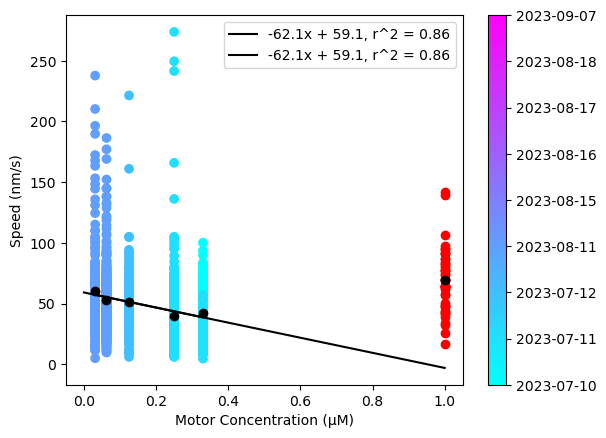

In [63]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mot_mean = df_plot.groupby('motor conc').mean().reset_index()

fig, ax = plt.subplots()

ax.scatter(df_plot['motor conc'], 
            df_plot['speed (nm/s)'], 
            c = colormap(normalize([datedic[date] for date in df_plot['date']])))
ax.scatter(mot_mean['motor conc'], mot_mean['speed (nm/s)'], c='k')
ax.scatter(Glut_df['motor conc'], Glut_df['speed (nm/s)'], color='red')
ax.scatter(1, Glut_df['speed (nm/s)'].mean(), color='k')
motconcfit = np.polyfit(mot_mean['motor conc'], mot_mean['speed (nm/s)'], deg=1)
motrsq = rsqrd(mot_mean['motor conc'], mot_mean['speed (nm/s)'], motconcfit[0], motconcfit[1])
ax.plot(mot_mean['motor conc'], motconcfit[0]*mot_mean['motor conc'] + motconcfit[1], 
         color='k', 
         label=str(round(motconcfit[0],1)) + 'x + ' + str(round(motconcfit[1],1)) + ', r^2 = ' + str(round(motrsq, 2)))
ax.plot(np.arange(0,1.1,0.1), motconcfit[0]*np.arange(0,1.1,0.1) + motconcfit[1], 
         color='k', 
         label=str(round(motconcfit[0],1)) + 'x + ' + str(round(motconcfit[1],1)) + ', r^2 = ' + str(round(motrsq, 2)))
ax.legend()
ax.set_xlabel('Motor Concentration (µM)')
ax.set_ylabel('Speed (nm/s)')
#ax.set_ylim(10,70)
cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/MotConcVSpeed.pdf')

## Look at the distribution of the data

In [40]:
def ecdf(array):
    arsort = np.sort(array)
    perc = np.arange(len(array))/len(array)
    return perc

In [41]:
def invgamma(alpha, beta, y):
    return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/4117647006.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])


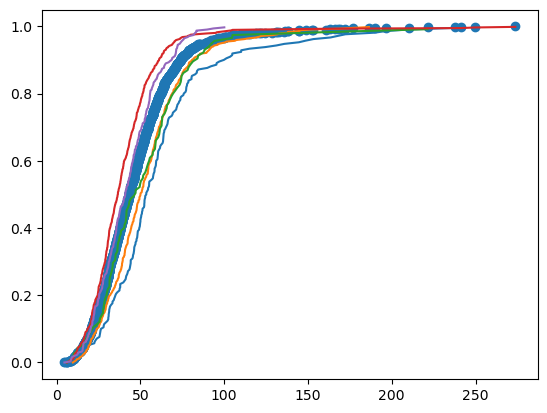

In [42]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
plt.scatter(np.sort(df_plot['speed (nm/s)']), ecdf(df_plot['speed (nm/s)']))
motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])
for conc in motor_concs[:-1]:
    df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] == conc), :]
    plt.plot(np.sort(df_plot['speed (nm/s)']), ecdf(df_plot['speed (nm/s)']))

In [43]:
np.median(df_plot['speed (nm/s)'])

40.887443438914005

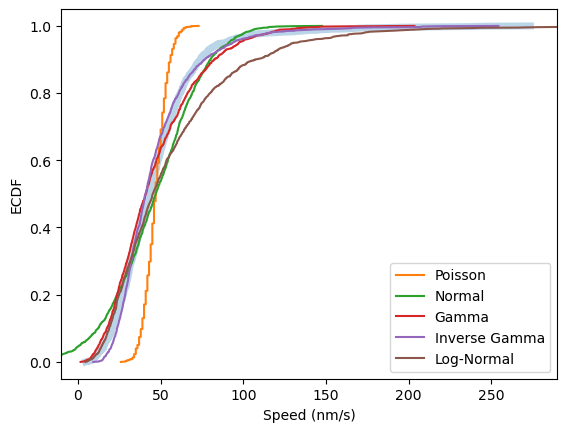

In [44]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mean = np.mean(df_plot['speed (nm/s)'])
stdv = np.std(df_plot['speed (nm/s)'])

plt.plot(np.sort(df_plot['speed (nm/s)']), ecdf(df_plot['speed (nm/s)']), alpha=0.3, lw=5)

poisgen = np.random.poisson(lam=mean, size=len(df_plot))
plt.plot(np.sort(poisgen), ecdf(poisgen), label='Poisson')

normgen = np.random.normal(mean, stdv, size = len(df_plot))
plt.plot(np.sort(normgen), ecdf(normgen), label='Normal')

alpha = mean**2 / stdv**2
beta = mean / stdv**2
gammagen = np.random.gamma(alpha, 1/beta, size=len(df_plot))
plt.plot(np.sort(gammagen), ecdf(gammagen), label='Gamma')

alpha= (mean/stdv)**2 + 2
beta = mean * ((mean/stdv)**2 +1)
invgammagen = 1 / np.random.gamma(alpha, 1/beta, size=len(df_plot))
plt.plot(np.sort(invgammagen), ecdf(invgammagen), label='Inverse Gamma')

sigma = np.sqrt(np.log(stdv/mean + 1))
mu = np.log(mean/ np.sqrt(stdv/mean**2 + 1))
lognormgen = np.random.lognormal(mu, sigma, size=len(df_plot))
plt.plot(np.sort(lognormgen), ecdf(lognormgen), label='Log-Normal')


plt.xlim(-10, 290)
plt.xlabel("Speed (nm/s)")
plt.ylabel("ECDF")
plt.legend()

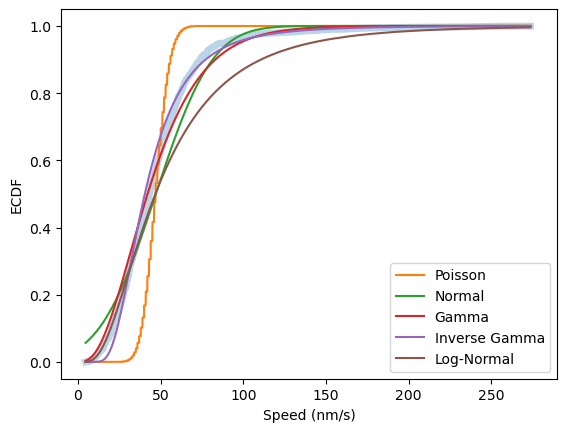

In [45]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mean = np.mean(df_plot['speed (nm/s)'])
stdv = np.std(df_plot['speed (nm/s)'])

speeds = np.sort(df_plot['speed (nm/s)'])

plt.plot(speeds, ecdf(speeds), alpha=0.3, lw=5)

poisdist = scipy.stats.poisson.cdf(speeds, mean)
plt.plot(speeds, poisdist, label='Poisson')

normdist = scipy.stats.norm.cdf(speeds, mean, stdv)
plt.plot(speeds, normdist, label='Normal')

alpha = mean**2 / stdv**2
beta = mean / stdv**2
gammadist = scipy.stats.gamma.cdf(speeds, alpha, scale=1/beta)
plt.plot(speeds, gammadist, label='Gamma')

alpha= (mean/stdv)**2 + 2
beta = mean * ((mean/stdv)**2 +1)
invgammadist = scipy.stats.invgamma.cdf(speeds, alpha, loc=0, scale=beta)
plt.plot(speeds, invgammadist, label='Inverse Gamma')

sigma = np.sqrt(np.log(stdv/mean + 1))
mu = np.log(mean/ np.sqrt(stdv/mean**2 + 1))
lognormdist = scipy.stats.lognorm.cdf(speeds, sigma, scale=np.exp(mu))
plt.plot(speeds, lognormdist, label='Log-Normal')


plt.xlim(-10, 290)
plt.xlabel("Speed (nm/s)")
plt.ylabel("ECDF")
plt.legend()
#plt.savefig('../../analyzed_data/gliding/figures/distributions.pdf')

In [46]:
invgammafit

NameError: name 'invgammafit' is not defined

In [47]:
np.arange(np.max(df_plot['speed (nm/s)']))

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/952670793.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)
/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/952670793.py:2: RuntimeWarning: invalid value encountered in multiply
  return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)


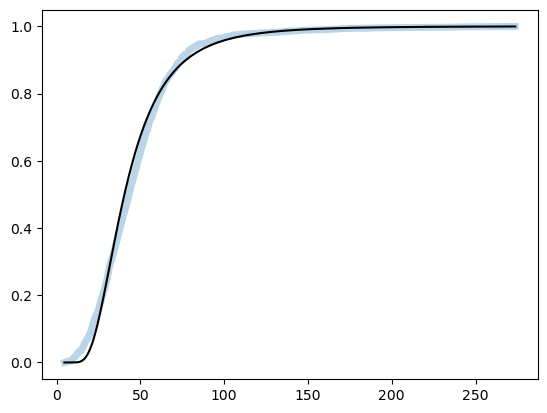

In [48]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
mean = np.mean(df_plot['speed (nm/s)'])
stdv = np.std(df_plot['speed (nm/s)'])
plt.plot(np.sort(df_plot['speed (nm/s)']), ecdf(df_plot['speed (nm/s)']), alpha=0.3, lw=5)

alpha= (mean/stdv)**2 + 2
beta = mean * ((mean/stdv)**2 +1)
invgammafit = invgamma(alpha, beta, np.arange(np.max(df_plot['speed (nm/s)'])))

plt.plot(np.sort(df_plot['speed (nm/s)']), scipy.stats.invgamma.cdf(np.sort(df_plot['speed (nm/s)']), alpha, loc=0, scale=beta), c='k')

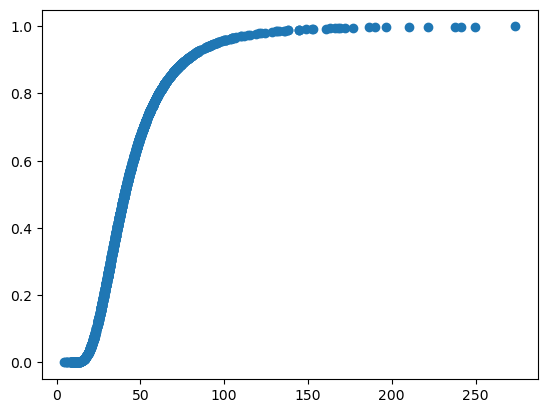

In [49]:
plt.scatter(df_plot['speed (nm/s)'], scipy.stats.invgamma.cdf(df_plot['speed (nm/s)'], alpha, loc=0, scale=beta))

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/952670793.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)
/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/952670793.py:2: RuntimeWarning: invalid value encountered in multiply
  return (scipy.special.gamma(alpha))**-1 * (beta**alpha / y**(alpha + 1)) * np.exp(-beta/y)


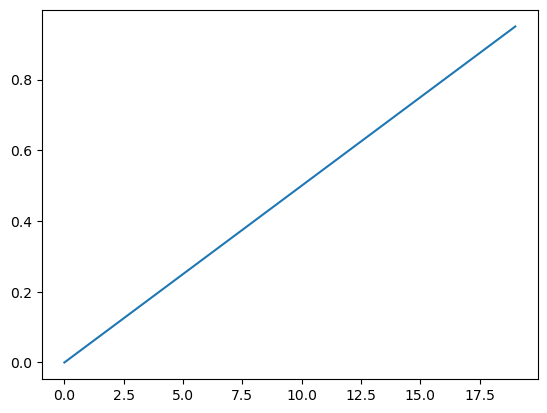

In [50]:
plt.plot(np.arange(20), ecdf(invgamma(0.5, 1, np.arange(20))))

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_8749/2597652675.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])


Text(0.5, 0.01, 'Speed (nm/s)')

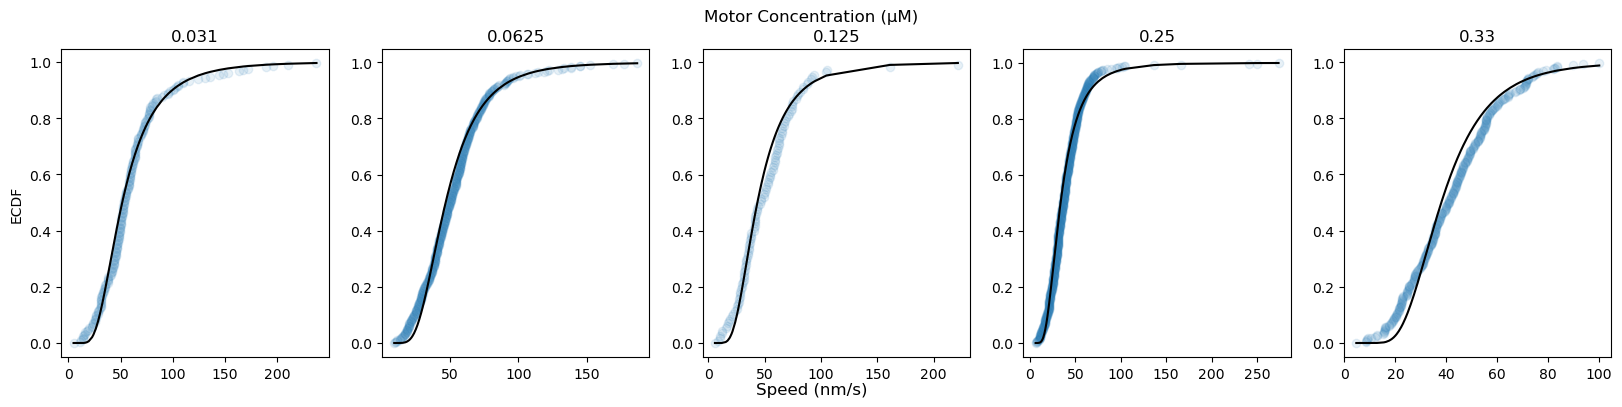

In [51]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])

fig, ax = plt.subplots(1, len(motor_concs[:-1]), figsize=(20, 4))
for i, conc in enumerate(motor_concs[:-1]):
    df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] == conc), :]
    speeds = np.sort(df_plot['speed (nm/s)'])
    ax[i].scatter(speeds, ecdf(speeds), alpha=0.1)
    
    mean = np.mean(df_plot['speed (nm/s)'])
    stdv = np.std(df_plot['speed (nm/s)'])
    alpha= (mean/stdv)**2 + 2
    beta = mean * ((mean/stdv)**2 +1)
    invgammadist = scipy.stats.invgamma.cdf(speeds, alpha, loc=0, scale=beta)
    ax[i].plot(speeds, invgammadist, label='Inverse Gamma', c='k')
    ax[i].set_title(conc)

ax[0].set_ylabel('ECDF', fontsize='10')
fig.suptitle('Motor Concentration (µM)')
fig.supxlabel('Speed (nm/s)')
#fig.savefig('../../analyzed_data/gliding/figures/motconc_dist.pdf')

In [52]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0) & (df['motor conc'] != 0.5), :]
len(np.where(df_plot['speed (nm/s)'] < 100)[0]), len(np.where(df_plot['speed (nm/s)'] > 100)[0])

(1557, 53)

# ATP
motor 0.0625, 0 ADP, 0 P

In [53]:
#Speed ATP fit
def kcatKm_eqn(conc, kcat, Km):
    """
    Given a concentration value in uM, this function returns motor speeds in nm/s
    
    Parameters:
    conc = 1D array of ATP concentrations in uM units
    kcat = maximum hydrolysis rate at saturating ATP units 1/s
    Km = concnetration at which motors walk at half max speed in units uM
    
    Returns:
    A 1D array of motor speeds corresponding to the given concentrations
    """
    
    return (kcat*conc)/(Km +conc)



#Curve-fit to the Langmuir curve
def kcatKm_curve_fit(conc, speeds, maxconc, d, p0):
    """
    Performs a curve fitting using scipy.optimize.curve_fit to fit data
    
    Parameters
    conc = 1D array of ATP concentrations in uM units
    speeds = 1D array of measured motor speeds in 1/s units
    maxconc = maximum concentration of data taken in uM units
    p0 = 1D list with 2 entries of parameter guesses for kcat and Km
    
    Returns
    param = 1D list with fit values of each parameter (kcat and Km)
    curve = 1D array of motor speeds for every concentration value in xvals
    xvals = 1D array from 0 to maxconc with step size 1
    """
    
    
    #Curve fits and returns parameter values as well as the covarience
    param, param_cov = curve_fit(kcatKm_eqn, 
                                 conc, 
                                 speeds/d,
                                 p0, 
                                 bounds = (np.zeros(2), np.ones([2])*np.inf))

    #stores the new function information according to the coefficients given by curve-fit() function 
    xvals=np.linspace(0, int(maxconc+1), int(maxconc+1))
    curve = d*kcatKm_eqn(xvals, param[0], param[1])
    
    return param, curve, xvals

In [54]:
param

NameError: name 'param' is not defined

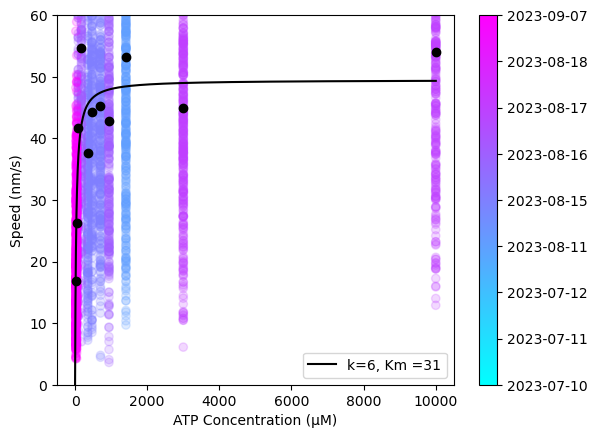

In [64]:
df_plot = df.loc[(df["motor conc"] == 0.0625) & (df["ADP"] == 0) & (df["P"] == 0), :]
ATP_mean = df_plot.groupby('ATP').mean().reset_index()

fig, ax = plt.subplots()
ax.scatter(df_plot['ATP'], df_plot['speed (nm/s)'], alpha=0.2, c = colormap(normalize([datedic[date] for date in df_plot['date']])))
ax.scatter(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], c='k')

param, curve, xval = kcatKm_curve_fit(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], np.max(ATP_mean['ATP']), 8, [100, 100])
ax.plot(xval, curve, c='k', label ='k=' + str(round(param[0])) + ', Km =' + str(round(param[1])))
# ATPfit = np.polyfit(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], deg=1)
# ATPrsq = rsqrd(ATP_mean['ATP'], ATP_mean['speed (nm/s)'], ATPfit[0], ATPfit[1])
# ax.plot(ATP_mean['ATP'], ATPfit[0]*ATP_mean['ATP'] + ATPfit[1], 
#          color='k', 
#          label=str(round(ATPfit[0],3)) + 'x + ' + str(round(ATPfit[1],1)) + ', r^2 = ' + str(round(ATPrsq, 2)))
ax.legend()
#ax.set_yscale('log')
ax.set_ylim(0,60)
#ax.set_xscale('log')
ax.set_xlabel('ATP Concentration (µM)')
ax.set_ylabel('Speed (nm/s)')
cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/ATPvSpeed.pdf')

In [76]:
np.sum(df_plot['ATP']==705.0)

365

# ADP

In [14]:
np.unique(df['ADP'])

array([   0., 1000.])

# MT length
- individual movies/conditions?
- All

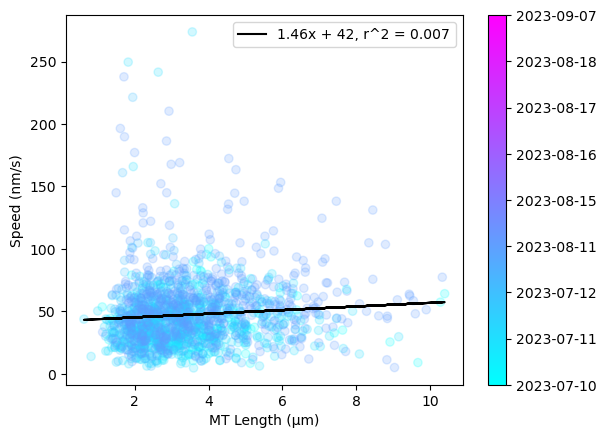

In [156]:
df_plot = df.loc[(df['ATP']==1410) & (df["ADP"] == 0) & (df["P"] == 0), :].reset_index()
fig, ax = plt.subplots()
ax.scatter(df_plot['MT len (um)'], 
           df_plot['speed (nm/s)'], 
           alpha=0.2,
           c = colormap(normalize([datedic[date] for date in df_plot['date']])))

nani = np.where(np.isnan(df_plot['MT len (um)']))[0]
lenfit = np.polyfit(df_plot['MT len (um)'].drop(nani), df_plot['speed (nm/s)'].drop(nani), deg=1)
lenrsq = rsqrd(df_plot['MT len (um)'].drop(nani), df_plot['speed (nm/s)'].drop(nani), lenfit[0], lenfit[1])
ax.plot(df_plot['MT len (um)'], lenfit[0]*df_plot['MT len (um)'] + lenfit[1], 
         color='k', 
         label=str(round(lenfit[0],2)) + 'x + ' + str(round(lenfit[1])) + ', r^2 = ' + str(round(lenrsq,3)))
ax.legend()
ax.set_ylabel('Speed (nm/s)')
ax.set_xlabel('MT Length (µm)')          

cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/MTlenVSpeed.pdf')

/var/folders/8p/dg75nl0d7ml8f_vqy6lvm3740000gn/T/ipykernel_2013/2438368617.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])


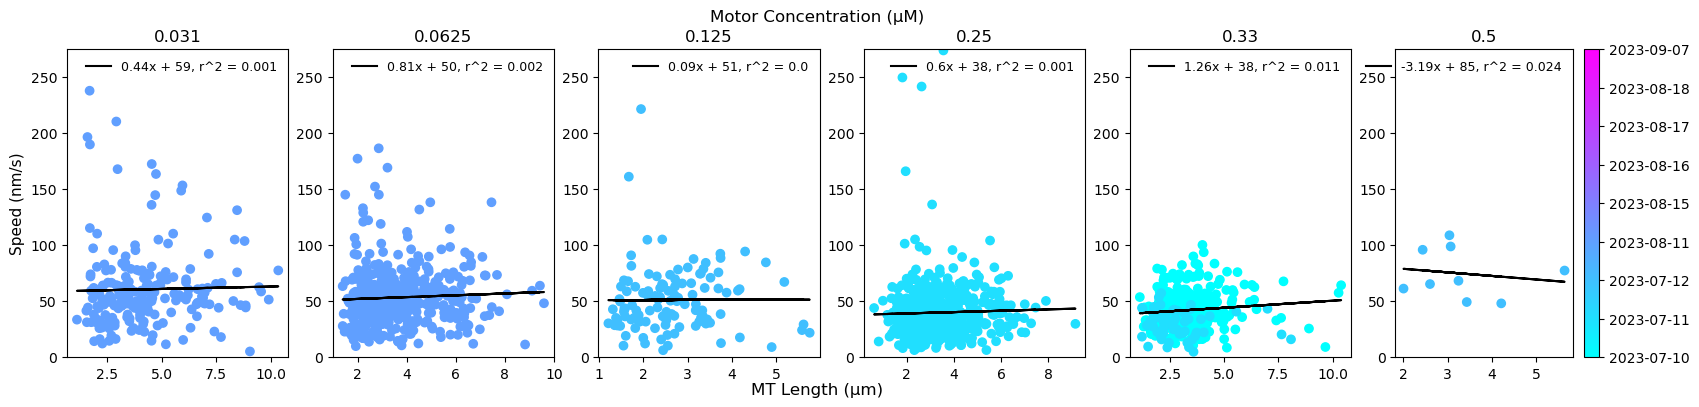

In [155]:
motor_concs = np.unique(df[df['ATP']==1410][df['ADP']==0][df['P']==0]['motor conc'])
fig, ax = plt.subplots(1,len(motor_concs), figsize=(20, 4))
for i, conc in enumerate(motor_concs):
    df_plot = df.loc[(df["motor conc"] == conc) & (df['ATP']==1410) & (df["ADP"] == 0) & (df["P"] == 0), :].reset_index()
    ax[i].scatter(df_plot['MT len (um)'], df_plot['speed (nm/s)'], c = colormap(normalize([datedic[date] for date in df_plot['date']])))
    ax[i].set_title(conc)
    
    #find if there are NaNs
    nani = np.where(np.isnan(df_plot['MT len (um)']))[0]
    
    lenfit = np.polyfit(df_plot['MT len (um)'].drop(nani), df_plot['speed (nm/s)'].drop(nani), deg=1)
    lenrsq = rsqrd(df_plot['MT len (um)'].drop(nani), df_plot['speed (nm/s)'].drop(nani), lenfit[0], lenfit[1])
    ax[i].plot(df_plot['MT len (um)'], lenfit[0]*df_plot['MT len (um)'] + lenfit[1], 
         color='k', 
         label=str(round(lenfit[0],2)) + 'x + ' + str(round(lenfit[1])) + ', r^2 = ' + str(round(lenrsq,3)))
    ax[i].legend(frameon=False, fontsize=9)
    ax[i].set_ylim(0, 275)

fig.suptitle('Motor Concentration (µM)')
fig.supxlabel('MT Length (µm)')
ax[0].set_ylabel('Speed (nm/s)', fontsize=11)

cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/MTlenVSpeed_bymotor.pdf')

# General Time

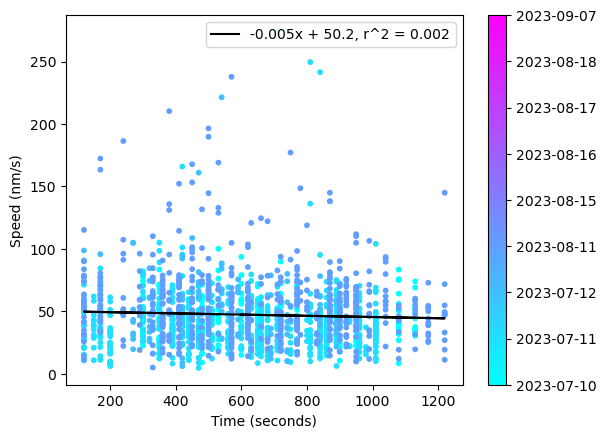

In [144]:
df_plot = df.loc[(df["ATP"] == 1410) & (df["ADP"] == 0) & (df["P"] == 0), :]

fig, ax = plt.subplots()
ax.scatter(df_plot['time (seconds)'], df_plot['speed (nm/s)'], s=10, c = colormap(normalize([datedic[date] for date in df_plot['date']])))
timefit = np.polyfit(df_plot['time (seconds)'], df_plot['speed (nm/s)'], deg=1)
timersq = rsqrd(df_plot['time (seconds)'], df_plot['speed (nm/s)'], timefit[0], timefit[1])
ax.plot(df_plot['time (seconds)'], timefit[0]*df_plot['time (seconds)'] + timefit[1], 
         color='k', 
         label=str(round(timefit[0],3)) + 'x + ' + str(round(timefit[1],1))+ ', r^2 = ' + str(round(timersq,3)))
ax.legend()
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Speed (nm/s)')
cbar = fig.colorbar(scalarmappable, ticks=datesnum)
cbar.ax.set_yticklabels(dates);
#fig.savefig('../../analyzed_data/gliding/figures/AcqTimeVSpeed.pdf')

# By hand

In [17]:
byhand_df = pd.read_csv('../../analyzed_data/gliding/By-hand-compare_2023-07-10_Gliding_ATP1410um_2-start0_stop50.csv')
auto_df = df.loc[(df["file_name"] == '2023-07-10_Gliding_0.33uMNCD_2000MT_1410uMATP_0uMADP_0uMP_5min-start0_stop51.csv'), :].reset_index()
byhand_df = byhand_df.loc[np.in1d(byhand_df['index'], auto_df['index'])==True].reset_index()

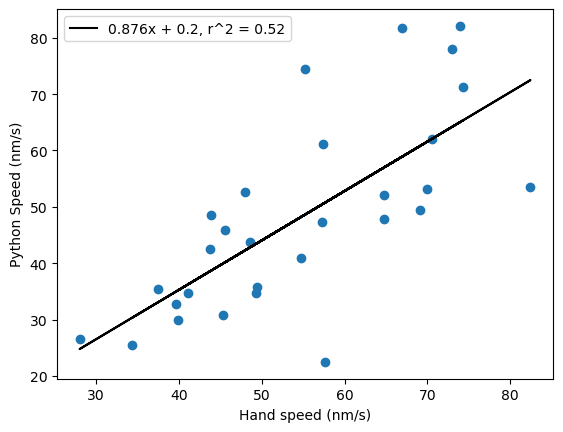

In [18]:
plt.scatter(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'])
handspeedfit = np.polyfit(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'], deg=1)
hs_rsq = rsqrd(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'], handspeedfit[0], handspeedfit[1])
plt.plot(byhand_df['hand speed (nm/s)'], handspeedfit[0]*byhand_df['hand speed (nm/s)'] + handspeedfit[1], 
         color='k', 
         label=str(round(handspeedfit[0],3)) + 'x + ' + str(round(handspeedfit[1],1)) + ', r^2 = ' + str(round(hs_rsq, 2)))

plt.xlabel('Hand speed (nm/s)')
plt.ylabel('Python Speed (nm/s)')
plt.legend()

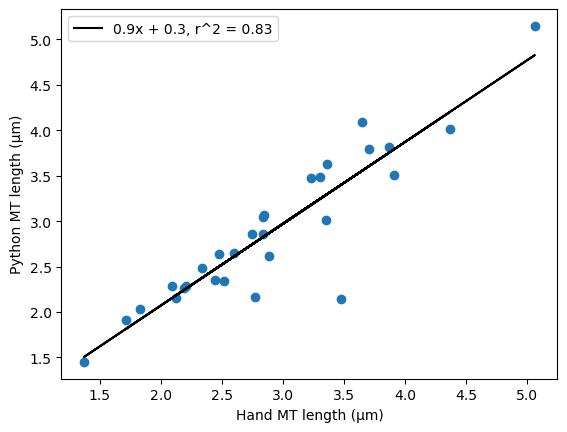

In [19]:
plt.scatter(byhand_df['hand length (um)'], auto_df['MT len (um)'])
handlenfit = np.polyfit(byhand_df['hand length (um)'], auto_df['MT len (um)'], deg=1)
hl_rsq = rsqrd(byhand_df['hand length (um)'], auto_df['MT len (um)'], handlenfit[0], handlenfit[1])
plt.plot(byhand_df['hand length (um)'], handlenfit[0]*byhand_df['hand length (um)'] + handlenfit[1], 
         color='k', 
         label=str(round(handlenfit[0],3)) + 'x + ' + str(round(handlenfit[1],1)) + ', r^2 = ' + str(round(hl_rsq, 2)))

plt.xlabel('Hand MT length (µm)')
plt.ylabel('Python MT length (µm)')
plt.legend()

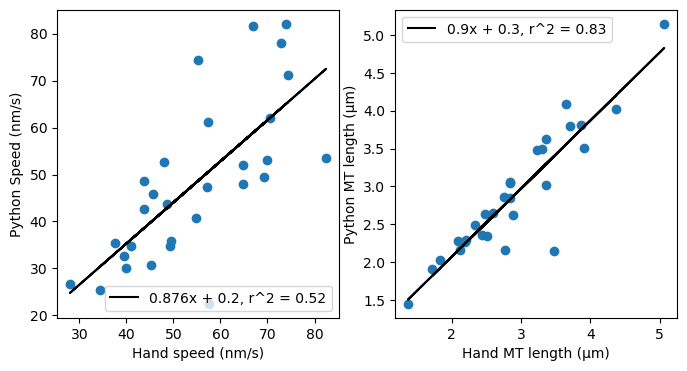

In [145]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'])
handspeedfit = np.polyfit(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'], deg=1)
hs_rsq = rsqrd(byhand_df['hand speed (nm/s)'], auto_df['speed (nm/s)'], handspeedfit[0], handspeedfit[1])
ax[0].plot(byhand_df['hand speed (nm/s)'], handspeedfit[0]*byhand_df['hand speed (nm/s)'] + handspeedfit[1], 
         color='k', 
         label=str(round(handspeedfit[0],3)) + 'x + ' + str(round(handspeedfit[1],1)) + ', r^2 = ' + str(round(hs_rsq, 2)))

ax[0].set_xlabel('Hand speed (nm/s)')
ax[0].set_ylabel('Python Speed (nm/s)')
ax[0].legend()


ax[1].scatter(byhand_df['hand length (um)'], auto_df['MT len (um)'])
handlenfit = np.polyfit(byhand_df['hand length (um)'], auto_df['MT len (um)'], deg=1)
hl_rsq = rsqrd(byhand_df['hand length (um)'], auto_df['MT len (um)'], handlenfit[0], handlenfit[1])
ax[1].plot(byhand_df['hand length (um)'], handlenfit[0]*byhand_df['hand length (um)'] + handlenfit[1], 
         color='k', 
         label=str(round(handlenfit[0],3)) + 'x + ' + str(round(handlenfit[1],1)) + ', r^2 = ' + str(round(hl_rsq, 2)))

ax[1].set_xlabel('Hand MT length (µm)')
ax[1].set_ylabel('Python MT length (µm)')
ax[1].legend()
#fig.savefig('../../analyzed_data/gliding/figures/ByHand.pdf')

## Gluteraldehyde

In [27]:
#Import files and add the names as strings to an array
Glut_file_path = '../../analyzed_data/gliding/2023-09-13_Gliding/'
# ff1 = '2023-07-10_Gliding/'
# ff2 = '2023-07-11_Gliding/'
# ff3 = '2023-07-12_Gliding/'
# ff4 = '2023-08-11_Gliding/'
# ff5 = '2023-08-15_Gliding/'
# ff6 = '2023-08-16_Gliding/'
# ff7 = '2023-08-17_Gliding/'
# ff8 = '2023-08-18_Gliding/'
# ff9 = '2023-09-07_Gliding/'
# ff = [ff1, ff2, ff3, ff4, ff5, ff6, ff7, ff8, ff9]
# included_files = '*.csv'

Glut_data_csv = []
Glut_path = Glut_file_path+included_files
Glut_data_csv = np.sort(glob.glob(Glut_path))

#Convert file names to a dataframe
Glut_dfs = []
for file in Glut_data_csv:
    temp_df=pd.read_csv(file)
    #add a column of file names
    temp_df['date']=file.split('/')[-2].split('_')[0]
    temp_df['file_name']=file.split('/')[-1]
    Glut_dfs.append(temp_df)
Glut_df=pd.concat(Glut_dfs)

#reset the index and drop any extraneous columns
Glut_df=Glut_df.reset_index()
Glut_df=Glut_df.drop(columns=['Unnamed: 0', 'level_0'])

In [28]:
Glut_data_csv

array(['../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_2-start0_stop51.csv',
       '../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_3-start0_stop51.csv',
       '../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_4-start0_stop51.csv',
       '../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_5-start0_stop51.csv',
       '../../analyzed_data/gliding/2023-09-13_Gliding/2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMADP_0uMP_0min_Glutaraldhyde_6-start0_stop51.csv'],
      dtype='<U138')

In [29]:
Glut_df

,index,area,major_axis_length,minor_axis_length,centroid-0,centroid-1,orientation,label,speed (nm/s),r^2,skele r^2,MT len (um),motor conc,MT dilute,ATP,ADP,P,time (seconds),date,file_name
0,0,31,39.083272,2.874851,28.419355,329.000000,-1.155322,2,57.650385,0.860484,0.977612,3.795111,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
1,1,37,44.377267,1.426823,85.243243,301.000000,-1.295527,5,25.373891,0.971362,0.852574,6.073580,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
2,3,27,31.469779,1.400102,103.000000,486.407407,-0.141581,7,42.229722,0.978526,0.868030,3.558225,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
3,4,53,67.537633,2.154805,109.849057,112.000000,1.133468,8,83.217330,0.911577,0.584382,6.609229,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
4,5,69,85.779112,1.866322,146.405797,262.000000,1.190889,9,70.075068,0.977209,0.996088,9.575393,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
5,6,57,65.807851,1.883874,164.000000,378.333333,-0.001233,10,91.260045,0.992865,0.977062,5.666578,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
6,7,49,69.588109,1.379570,173.000000,488.714286,0.621814,11,64.851674,0.995896,0.967801,7.443439,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
7,8,62,71.858007,1.577097,174.016129,206.500000,1.483119,13,91.464027,0.995951,0.984018,7.010812,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
8,9,65,76.042474,2.235577,228.000000,279.230769,0.162085,14,69.047873,0.929287,0.920040,9.351270,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...
9,10,62,79.804757,1.239283,283.677419,182.500000,1.112798,16,95.033502,0.976333,0.674192,8.338983,1.0,50.0,1410.0,0.0,0.0,0.0,2023-09-13,2023-09-13_Gliding_1uMNCD_50MT_1410uMATP_0uMAD...


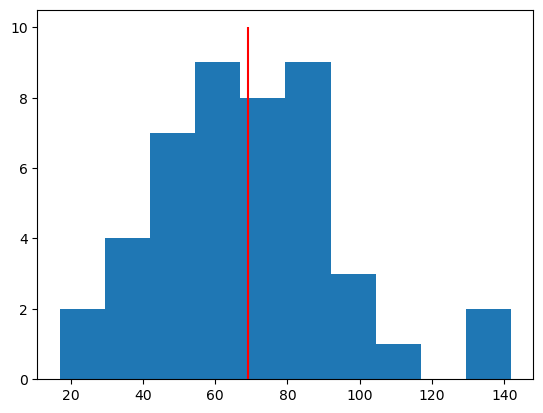

In [31]:
plt.hist(Glut_df['speed (nm/s)'])
plt.vlines(np.mean(Glut_df['speed (nm/s)']), 0, 10, color='red')